# <center> <u> Modern Portfolio Theory </u> </center> 

In [1]:
import numpy as np 
import pandas as pd 

from numba import jit 

import seaborn as sns
import matplotlib.pyplot as plt 

## <centeR> Mathematical Structure </center> 

## <center> $ r_{p} = \sum_{i=1}^{N} w_{i} r_{i} $ </center> 

## <center> $ \sigma_{AB} = \rho_{AB} \sigma_{A} \sigma_{B} $ </center>

## <center> $ \sigma_{p}^{2} = w_{A}^{2} \sigma_{A}^{2} + w_{B}^{2} \sigma_{B}^{2} + 2 w_{A} w_{B} \sigma_{AB} $ </center>

## <center> $ \sigma_{p} = \sqrt{w_{A}^{2} \sigma_{A}^{2} + w_{B}^{2} \sigma_{B}^{2} + 2 w_{A} w_{B} \sigma_{AB}} $ </center>

In [2]:
sns.set_theme(
    context = "notebook",
    style = "darkgrid", 
    palette = "pastel",
)

sns.set(rc = {'figure.figsize':(10, 5)})

## <center> Optimal Weights Portfolio </center>

In [3]:
N = 1000

r_A = 0.175
s_A = 0.067
w_A = np.linspace(0, 1, N)

r_B = 0.055
s_B = 0.013
w_B = 1 - w_A

s_AB = -0.005

r_P = (w_A * r_A) + (w_B * r_B)
s_P = (w_A**2 * s_A) + (w_B**2 * s_B) + (2 * w_A * w_B * s_AB)

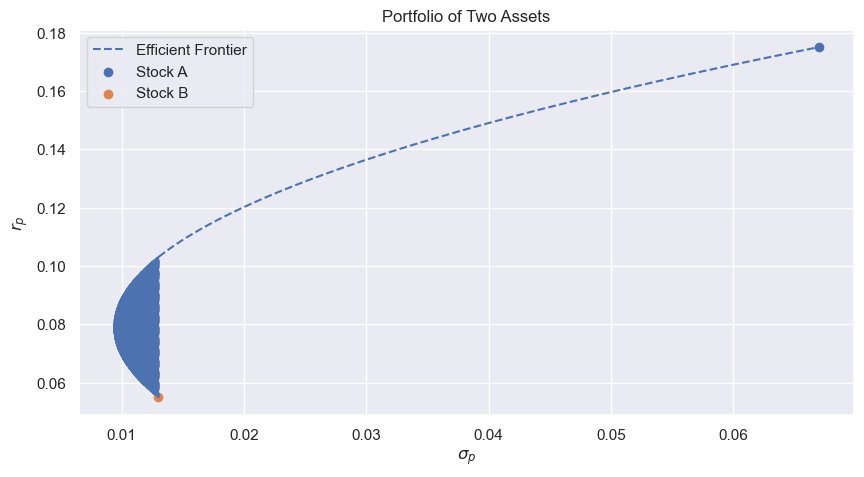

In [4]:
ax = sns.lineplot(
    x = s_P, 
    y = r_P,
    label = "Efficient Frontier",
    linestyle = "--"
)

plt.scatter(
    x = s_A,
    y = r_A,
    label = "Stock A"
)

plt.scatter(
    x = s_B,
    y = r_B,
    label = "Stock B"
)

ax.set(
    title = "Portfolio of Two Assets",
    xlabel = "$ \sigma_{p} $",
    ylabel = "$ r_{p} $",
)

plt.legend(loc = "best")
plt.show()

## <center> Optimization Routine </center> 

## <center> $ \min \sigma_{p}^{2} = w_{A}^{2} \sigma_{A}^{2} + w_{B}^{2} \sigma_{B}^{2} + 2 w_{A} w_{B} \sigma_{AB} $ </center>

## <center> $ w_{A} + w_{B} = 1 $</center>

## <center> $ \min \sigma_{p}^{2} = w_{A}^{2} \sigma_{A}^{2} + (1 - w_{A})^{2} \sigma_{B}^{2} + 2 w_{A} (1 - w_{A}) \sigma_{AB} $ </center>

## <center> Gradient </center> 

## <center> $ \frac{\partial \sigma_{p}^{2}}{\partial w_{A}} = 2 w_{A} \sigma_{A}^{2} + 2 (1 - w_{A}) \sigma_{B}^{2} + 2 \sigma_{AB} (1 - 2 w_{A}) = 0 $ </center>

## <center> Analytical Solution </center> 

## <center> $ w_{A}^{min} = \frac{\sigma_{B}^{2} - \sigma_{AB}}{\sigma_{A}^{2} + \sigma_{B}^{2} - 2 \sigma_{AB}} $ </center>

## <center> $ w_{B}^{min} = 1 - w_{A}^{min} $ </center> 

## <center> LaGrange Multipliers </center> 

## <center> $ L(x_{A}, x_{B}, \lambda) = w_{A}^{2} \sigma_{A}^{2} + w_{B}^{2} \sigma_{B}^{2} + 2 w_{A} w_{B} \sigma_{AB} + \lambda(x_{A} + x_{B} - 1)$ </center> 

## <center> Gradient </center>

## <center> $ \frac{\partial L}{\partial w_{A}} = 2 w_{A} \sigma_{A}^{2} + 2 w_{B} \sigma_{AB} = 0 $ </center> 

## <center> $ \frac{\partial L}{\partial w_{B}} = 2 w_{B} \sigma_{B}^{2} + 2 w_{A} \sigma_{AB} = 0 $ </center> 

## <center> $ \frac{\partial L}{\partial \lambda} = w_{A} + w_{B} - 1 = 0 $ </center> 

## <center> $ w_{B} = w_{A} (\frac{\sigma_{A}^{2} - \sigma_{AB}}{\sigma_{B}^{2} - \sigma_{AB}}) $ </center> 

In [5]:
w_A = (0.013 + 0.005) / (0.067 + 0.013 - 2 * -0.005)
print("Optimal A: ", w_A)

Optimal A:  0.19999999999999998


In [6]:
w_B = 1 - w_A
print("Optimal B: ", w_B)

Optimal B:  0.8


In [7]:
optimal_return = (w_A * r_A) + (w_B * r_B)
print("Optimal Return: ", optimal_return)

Optimal Return:  0.079


In [8]:
optimal_variance = (w_A**2 * s_A) + (w_B**2 * s_B) + (2 * w_A * w_B * s_AB)
print("Optimal Variance: ", optimal_variance)

Optimal Variance:  0.0094


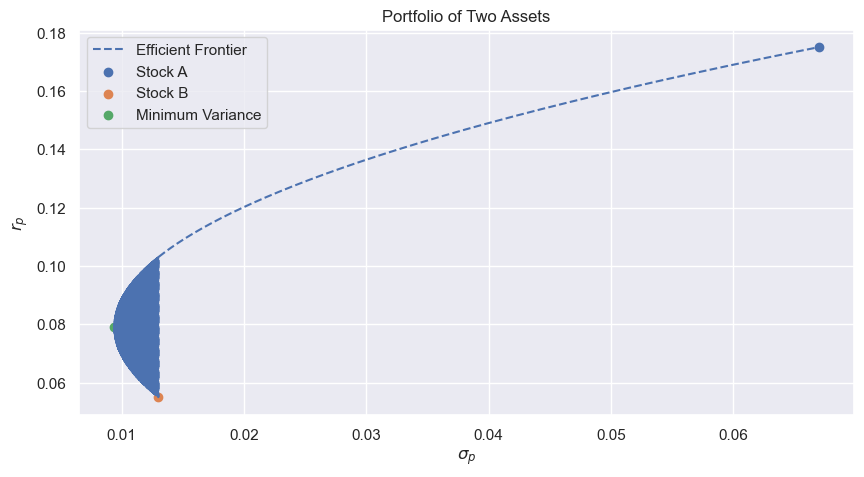

In [9]:
ax = sns.lineplot(
    x = s_P, 
    y = r_P,
    label = "Efficient Frontier",
    linestyle = "--"
)

plt.scatter(
    x = s_A,
    y = r_A,
    label = "Stock A"
)

plt.scatter(
    x = s_B,
    y = r_B,
    label = "Stock B"
)

plt.scatter(
    x = optimal_variance,
    y = optimal_return,
    label = "Minimum Variance"
)

ax.set(
    title = "Portfolio of Two Assets",
    xlabel = "$ \sigma_{p} $",
    ylabel = "$ r_{p} $",
)

plt.legend(loc = "best")
plt.show()

## <center> Sharpe Ratio </center> 

## <center> $ SR = \frac{r_{p} - r_{f}}{\sigma_{p}} $ </center>

In [10]:
r_f = 0.03
sigma_c = r_f * np.linspace(0, 1, N)

In [11]:
sharpe_A = (r_A - r_f) / s_A
print("Sharpe A: ", sharpe_A)

A = r_f + sharpe_A * sigma_c

Sharpe A:  2.1641791044776117


In [12]:
sharpe_B = (r_B - r_f) / s_B
print("Sharpe A: ", sharpe_B)

B = r_f + sharpe_B * sigma_c

Sharpe A:  1.9230769230769234


In [13]:
sharpe_P = (optimal_return - r_f) / optimal_variance
print("Minimum Variance Sharpe: ", sharpe_P)

P = r_f + sharpe_P * sigma_c

Minimum Variance Sharpe:  5.212765957446808


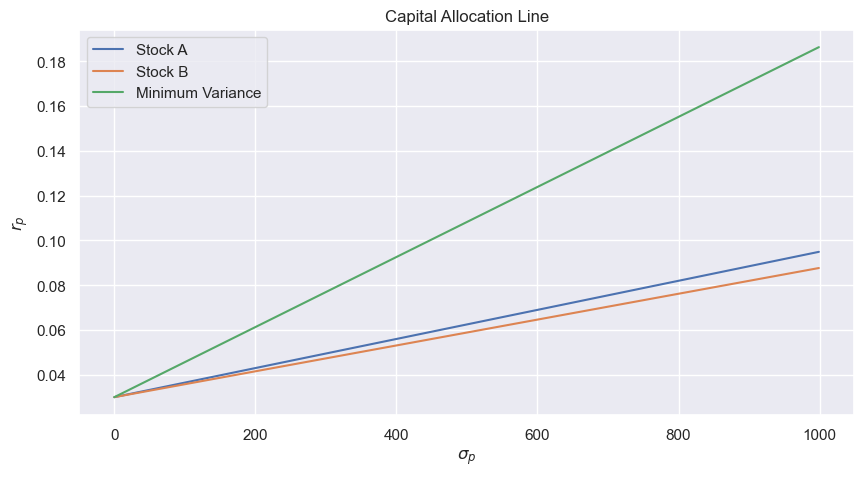

In [14]:
ax = sns.lineplot(
    A, 
    label = "Stock A"
)

sns.lineplot(
    B, 
    label = "Stock B"
)

sns.lineplot(
    P, 
    label = "Minimum Variance"
)

ax.set(
    title = "Capital Allocation Line",
    xlabel = "$ \sigma_{p} $",
    ylabel = "$ r_{p} $"
)

plt.show()

## <center> Capital Allocation Line </center> 

## <center> $ \mu_{p} = r_{f} + \frac{r_{p} - r_{f}}{\sigma_{p}} \sigma_{c} $ </center>

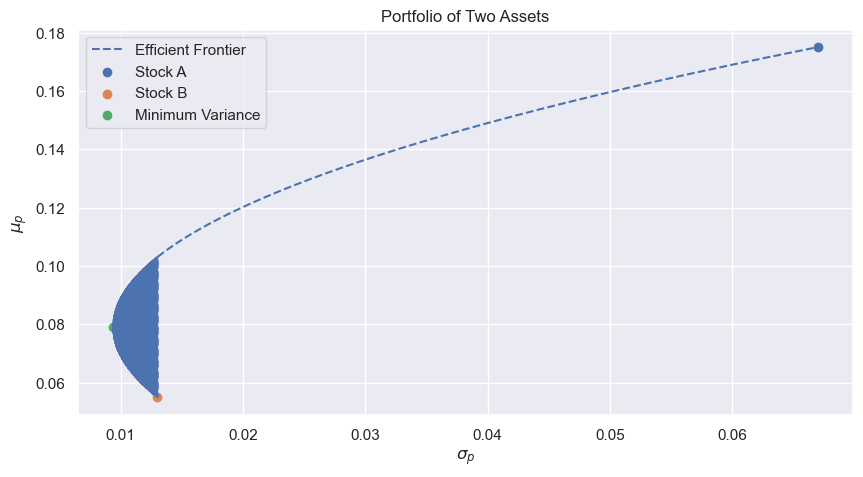

In [15]:
ax = sns.lineplot(
    x = s_P, 
    y = r_P,
    label = "Efficient Frontier",
    linestyle = "--"
)

plt.scatter(
    x = s_A,
    y = r_A,
    label = "Stock A"
)

plt.scatter(
    x = s_B,
    y = r_B,
    label = "Stock B"
)

plt.scatter(
    x = optimal_variance,
    y = optimal_return,
    label = "Minimum Variance"
)

ax.set(
    title = "Portfolio of Two Assets",
    xlabel = "$ \sigma_{p} $",
    ylabel = "$ \mu_{p} $",
)

plt.legend(loc = "best")
plt.show()

## <center> Optimization Procedure </center> 

## <center> $ \max SR_{p} = \frac{\mu_{p} - r_{f}}{\sigma_{p}} $ </center> 

## <center> $ \max = \frac{w_{A} (\mu_{A} - r_{f}) + (1 - w_{A}) (\mu_{B} - r_{f})}{\sqrt{w_{A}^{2} \sigma_{A}^{2} + (1 - w_{A})^{2} \sigma_{B}^{2} + 2 w_{A} (1 - w_{A}) \sigma_{AB}}} $ </center>

## <center> $ x_{A}^{T} = \frac{(\mu_{A} - r_{f}) \sigma_{B}^{2} - (\mu_{B} - r_{f}) \sigma_{AB}}{(\mu_{A} - r_{f}) \sigma_{B}^{2} + (\mu_{B} - r_{f}) \sigma_{A}^{2} - (\mu_{A} -r_{f} + \mu_{B} - r_{f}) \sigma_{AB}} $ </center>

## <center> $ x_{B}^{T} = 1 - x_{A}^{T} $ </center>

In [16]:
w_A = ((r_A - r_f) * s_B - (r_B - r_f) * s_AB) / ((r_A - r_f) * s_B + (r_B - r_f) * s_A - (r_A - r_f + r_B - r_f) * s_AB)
print("Optimal Sharpe A: ", w_A)

Optimal Sharpe A:  0.45578231292517


In [17]:
w_B = 1 - w_A
print("Optimal Sharpe B: ", w_B)

Optimal Sharpe B:  0.54421768707483


In [18]:
optimal_sharpe_return = (w_A * r_A) + (w_B * r_B)
print("Optimal Return: ", optimal_sharpe_return)

Optimal Return:  0.10969387755102039


In [19]:
optimal_sharpe_variance = (w_A**2 * s_A) + (w_B**2 * s_B) + (2 * w_A * w_B * s_AB)
print("Optimal Variance: ", optimal_sharpe_variance)

Optimal Variance:  0.015288213244481465


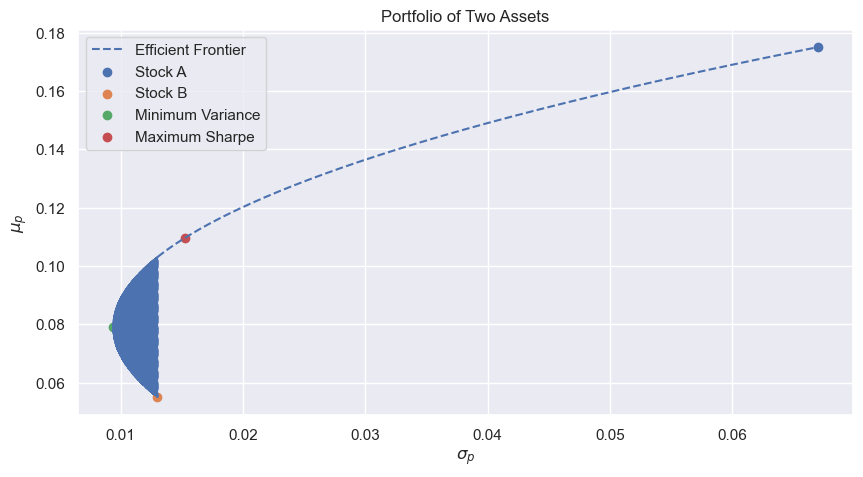

In [20]:
ax = sns.lineplot(
    x = s_P, 
    y = r_P,
    label = "Efficient Frontier",
    linestyle = "--"
)

plt.scatter(
    x = s_A,
    y = r_A,
    label = "Stock A"
)

plt.scatter(
    x = s_B,
    y = r_B,
    label = "Stock B"
)

plt.scatter(
    x = optimal_variance,
    y = optimal_return,
    label = "Minimum Variance"
)

plt.scatter(
    x = optimal_sharpe_variance,
    y = optimal_sharpe_return,
    label = "Maximum Sharpe"
)

ax.set(
    title = "Portfolio of Two Assets",
    xlabel = "$ \sigma_{p} $",
    ylabel = "$ \mu_{p} $",
)

plt.legend(loc = "best")
plt.show()

## <center> Inverse Quadratic Interpolation </center> 

## <center> $ f^{-1}(y) = \frac{(y - f_{n-1}) (y - f_{n})}{(f_{n-2} - f_{n-1})(f_{n-2} - f_{n})} x_{n-2} + \frac{(y - f_{n-2}) (y - f_{n})}{(f_{n-1} - f_{n-2})(f_{n-1} - f_{n})}x_{n-1} + \frac{(y - f_{n-2}) (y - f_{n-1})}{(f_{n} - f_{n-2})(f_{n} - f_{n-1})}x_{n} $ </center>